In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 177.8 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 170.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.7 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#Identify and remove duplicate rows.
# Step 1: Identify duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]  # Shows all duplicate instances

# Step 2: Display duplicate rows
print("Duplicate rows in the dataset:")
print(duplicate_rows)

Duplicate rows in the dataset:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHav

In [6]:
print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 0 duplicate rows.


In [7]:
#Identify missing values in CodingActivities.
# Step 1: Count missing values in 'CodingActivities' column
missing_coding_activities = df['CodingActivities'].isnull().sum()

# Step 2: Display the result
print(f"Number of missing values in 'CodingActivities': {missing_coding_activities}")

Number of missing values in 'CodingActivities': 10971


In [8]:
#Impute missing values in CodingActivities with forward-fill.
# Step 1: Apply forward-fill to impute missing values
df['CodingActivities'].fillna(method='ffill', inplace=True)

# Step 2: Display the updated dataset
print("Updated 'CodingActivities' column after forward-fill imputation:")
print(df)

Updated 'CodingActivities' column after forward-fill imputation:
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            Remo

/tmp/ipykernel_329/289839752.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_329/289839752.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


In [9]:
# Step 1: Drop rows with NaN values
df_cleaned = df.dropna()

# Step 2: Display the cleaned dataset
print("Dataset after dropping rows with NaN values:")
print(df_cleaned)

Dataset after dropping rows with NaN values:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, Offi

In [10]:
#Identify compensation-related columns, such as ConvertedCompYearly
# Step 1: Identify compensation-related columns
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col or 'Stock' in col]

# Step 2: Display the identified columns
print("Compensation-related columns:", compensation_columns)

Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [16]:
# Normalize ConvertedCompYearly using Min-Max Scaling.¶
%pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 164.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 189.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Step 1: Handle missing values (fill with median)
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# Step 2: Initialize Min-Max Scaler
scaler = MinMaxScaler()

# Step 3: Apply Min-Max Scaling and create a new column
df['ConvertedCompYearly_MinMax'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Step 4: Display the updated DataFrame
print(df)

       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

/tmp/ipykernel_329/991859423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


In [18]:
#Apply Z-score Normalization to ConvertedCompYearly.
# Step 1: Handle missing values (fill with median)
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# Step 2: Initialize Standard Scaler
scaler = StandardScaler()

# Step 3: Apply Z-score Normalization and create a new column
df['ConvertedCompYearly_Zscore'] = scaler.fit_transform(df[['ConvertedCompYearly']])

# Step 4: Display the updated DataFrame
print(df)

/tmp/ipykernel_329/775913450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


NameError: name 'StandardScaler' is not defined

In [20]:
avg = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()
df['zscore'] = ((df['ConvertedCompYearly']-avg)/std)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_MinMax,zscore
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,0.003998,-0.067513
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,NaN,65000.0,NaN,0.003998,-0.067513
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,65000.0,NaN,0.003998,-0.067513
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,Hobby;Contribute to open-source projects;Other...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,65000.0,NaN,0.003998,-0.067513
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,Hobby;Contribute to open-source projects;Other...,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,65000.0,NaN,0.003998,-0.067513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,0.003998,-0.067513
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,0.003998,-0.067513
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,0.003998,-0.067513
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,NaN,NaN,65000.0,NaN,0.003998,-0.067513


In [27]:
!pip install seaborn
import seaborn as sns

/tmp/ipykernel_329/2934570066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)


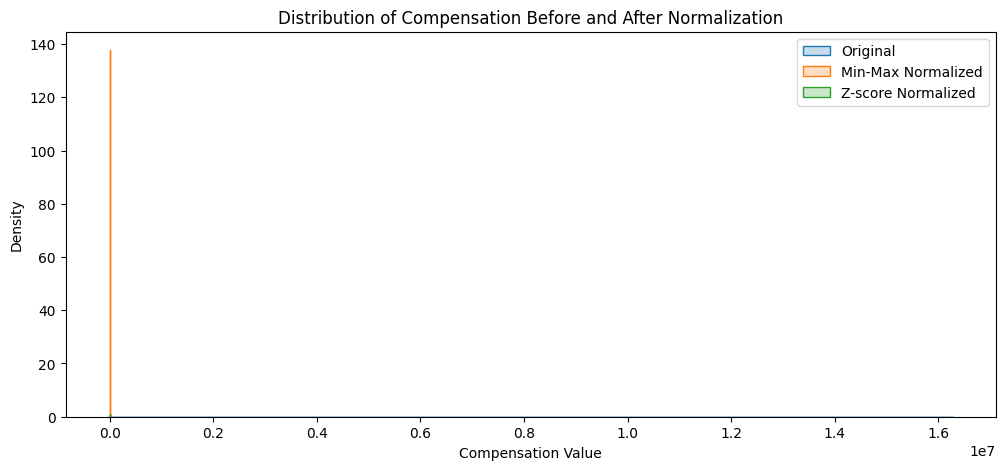

In [30]:


# Handle missing values (fill with median)
df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df['ConvertedCompYearly_MinMax'] = minmax_scaler.fit_transform(df[['ConvertedCompYearly']])

# Apply Z-score Normalization
avg = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()
df['zscore'] = ((df['ConvertedCompYearly']-avg)/std)


# Plot distributions
plt.figure(figsize=(12, 5))

# Original distribution
sns.kdeplot(df['ConvertedCompYearly'], label="Original", fill=True)

# Min-Max Normalized distribution
sns.kdeplot(df['ConvertedCompYearly_MinMax'], label="Min-Max Normalized", fill=True)

# Z-score Normalized distribution
sns.kdeplot(df['zscore'], label="Z-score Normalized", fill=True)

plt.title("Distribution of Compensation Before and After Normalization")
plt.xlabel("Compensation Value")
plt.ylabel("Density")
plt.legend()
plt.show()